In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


from scipy.spatial.distance import cdist, pdist 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN


In [ ]:
from google.colab import files
upload = files.upload()

Saving ilustrasi k means.csv to ilustrasi k means.csv


In [ ]:
ilus = pd.read_csv('ilustrasi k means.csv',sep=';')

In [ ]:
ilus.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


In [ ]:
#Lingkage Ward

In [ ]:
silhouette_scores = []
number_of_cluster = range(2,11)
for i in number_of_cluster:
  agglo = AgglomerativeClustering(n_clusters=i,linkage='ward')
  agglo.fit(ilus)
  label = agglo.labels_
  silhouette_scores.append(silhouette_score(ilus,label, metric='euclidean'))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'silhouette score')

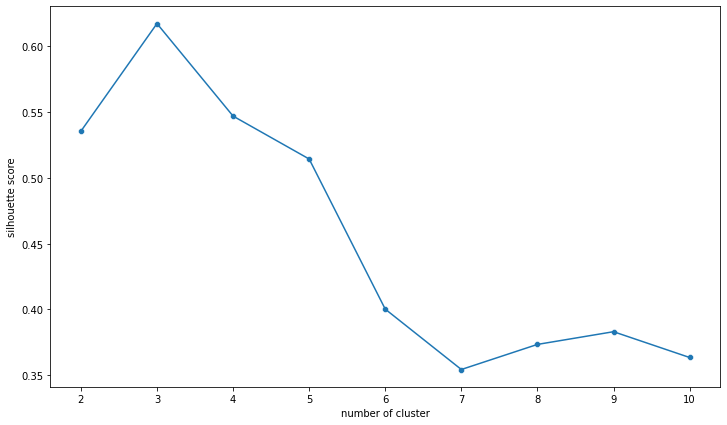

In [ ]:
#finding optimal number of cluster

plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster,silhouette_scores)
sns.scatterplot(number_of_cluster,silhouette_scores)
plt.xlabel('number of cluster')
plt.ylabel('silhouette score')


Ward

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3,linkage='ward')
agglo.fit(ilus)
label = agglo.labels_
ilus['ward'] = label

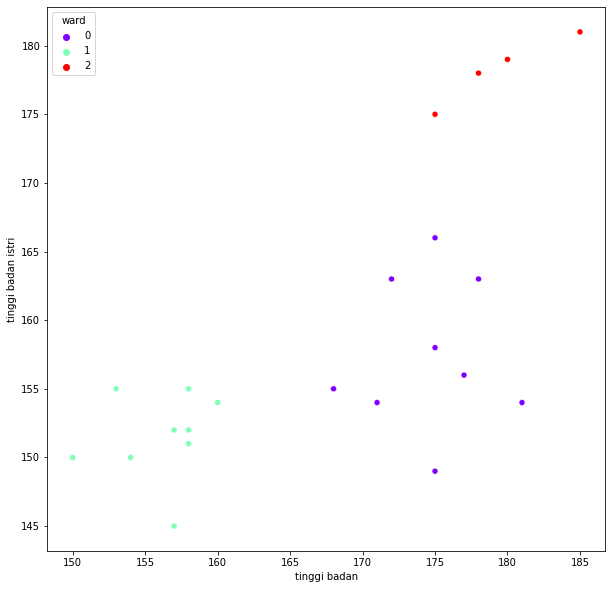

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', hue='ward', data=ilus, palette='rainbow')
plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')
plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3,linkage='complete')
agglo.fit(ilus)
label = agglo.labels_
ilus['complete'] = label

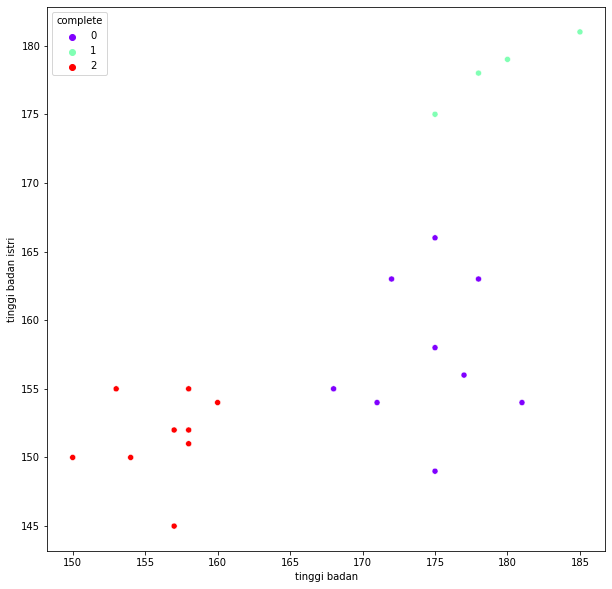

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', hue='complete', data=ilus, palette='rainbow')
plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')
plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3,linkage='average')
agglo.fit(ilus)
label = agglo.labels_
ilus['Average'] = label

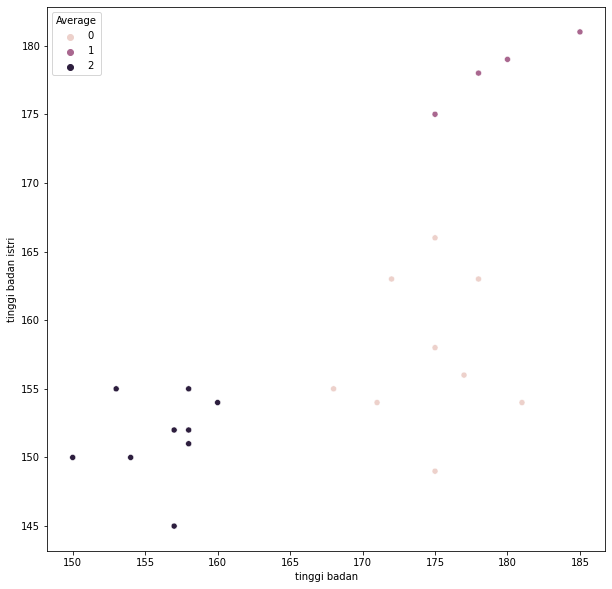

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', hue='Average', data=ilus)
plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')
plt.show()

In [ ]:
ilus

,tinggibadan,tinggibadanistri,ward,complete,Average
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


In [ ]:
ilus_2 = pd.read_csv('ilustrasi k means.csv',sep=';')

In [ ]:
ilus_2.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(ilus_2)
x_scaled

array([[ 0.66695822,  1.56643226],
       [ 0.95095333,  1.85765628],
       [ 0.66695822,  0.69276018],
       [ 1.14028341,  1.95473096],
       [ 1.6136086 ,  2.14888031],
       [ 0.95095333,  0.40153616],
       [ 0.66695822, -0.08383722],
       [ 1.23494845, -0.47213592],
       [ 0.00430296, -0.37506124],
       [ 0.28829807, -0.47213592],
       [ 0.8562883 , -0.27798657],
       [-0.94234742, -0.37506124],
       [-0.94234742, -0.66628527],
       [ 0.66695822, -0.95750929],
       [ 0.38296311,  0.40153616],
       [-0.94234742, -0.76335994],
       [-1.41567261, -0.37506124],
       [-1.69966772, -0.86043462],
       [-1.03701246, -0.66628527],
       [-1.32100757, -0.86043462],
       [-1.03701246, -1.34580799],
       [-0.75301735, -0.47213592]])

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples= 6)
cluster = dbscan.fit_predict(x_scaled)
cluster

array([-1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  1])

In [ ]:
silhouette_score(x_scaled,cluster)

0.6161772649616482

In [ ]:
score = []
for eps in [i/10 for i in range(6,8)]:
  for min_sample in range(4,6):
    print('\neps={}'.format(eps))
    print('min_saple={}'.format(min_sample))
    dbscan = DBSCAN(eps=eps, min_samples=min_sample)
    label = dbscan.fit_predict(x_scaled)
    print('score:{}'.format(silhouette_score(x_scaled,label)))




eps=0.6
min_saple=4
score:0.3901682187136734

eps=0.6
min_saple=5
score:0.35497113213899967

eps=0.7
min_saple=4
score:0.6161772649616482

eps=0.7
min_saple=5
score:0.6161772649616482


In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples= 4)
cluster = dbscan.fit_predict(x_scaled)
cluster

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_scaled

array([[ 0.66695822,  1.56643226],
       [ 0.95095333,  1.85765628],
       [ 0.66695822,  0.69276018],
       [ 1.14028341,  1.95473096],
       [ 1.6136086 ,  2.14888031],
       [ 0.95095333,  0.40153616],
       [ 0.66695822, -0.08383722],
       [ 1.23494845, -0.47213592],
       [ 0.00430296, -0.37506124],
       [ 0.28829807, -0.47213592],
       [ 0.8562883 , -0.27798657],
       [-0.94234742, -0.37506124],
       [-0.94234742, -0.66628527],
       [ 0.66695822, -0.95750929],
       [ 0.38296311,  0.40153616],
       [-0.94234742, -0.76335994],
       [-1.41567261, -0.37506124],
       [-1.69966772, -0.86043462],
       [-1.03701246, -0.66628527],
       [-1.32100757, -0.86043462],
       [-1.03701246, -1.34580799],
       [-0.75301735, -0.47213592]])

In [ ]:
ilus_2['cluster'] = cluster
ilus_2

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,1
3,180,179,0
4,185,181,0
5,178,163,1
6,175,158,1
7,181,154,1
8,168,155,1
9,171,154,1


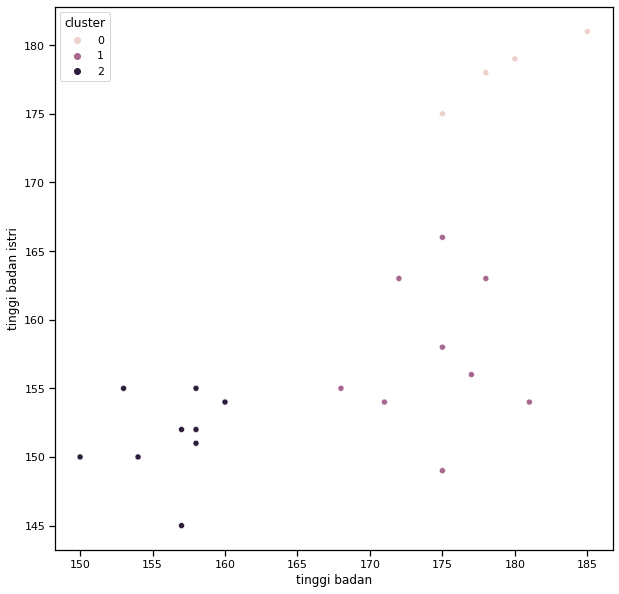

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook',)
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', hue='cluster', data=ilus_2)

plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')
plt.show()